In [7]:
import os
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from xgboost import XGBClassifier


train = pd.read_csv('train2.csv',encoding = 'big5')
test = pd.read_csv('test2.csv',encoding = 'big5')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_validate


from sklearn.metrics import (confusion_matrix,
                             precision_recall_curve,
                             auc,roc_auc_score,
                             roc_curve,recall_score,
                             classification_report)

In [8]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False)

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold.split(x_train_data)):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [17]:
from sklearn.model_selection import train_test_split
X = train.drop(columns = ['Y1','CUS_ID'])
y = train['Y1']
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size=0.25, random_state=33)

lr = LogisticRegression(C = 0.01, penalty = 'l2')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
ROC_AUC = roc_auc_score(y_test,y_pred)




# X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size=0.25, random_state=33)
# xgbc = XGBClassifier()
# xgbc.fit(X_train, y_train)

# from sklearn.metrics import roc_auc_score
# y_pred = xgbc.predict(X_test)
# ROC_AUC = roc_auc_score(y_pred,y_test)
# print('ROC_AUC = :', ROC_AUC)



/Users/liaoshousan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
ROC_AUC

0.5020848757980578

(2.0, 0.0)

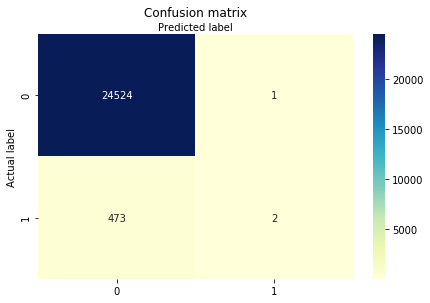

In [16]:
from sklearn import metrics
import seaborn as sns

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) #this line of code is for tidylayout